# Performance Tests

## Objective

*The main objective of this section is of evaluating the performance & efficiency of embeddings algorithms*

The algorithms to be tested will be: **<span style="color:blue">RandomWalk</span>** and **<span style="color:blue">Walklets</span>**  
**<span style="color:blue">RandomWalk</span>** - embeds trained using a corpus made via random-walk (k=scale=1)   
**<span style="color:blue">Walklets</span>** - embeds trained using a corpus made via random-walk, with k-scaled(distanced) pairs==>Multiscale latent representation

*An emmbedding is a form of a cell that stores some relevant information that are of several categories,
and they are used to represent an input in a much simpler way, so after a model could consume this valid data,  
or they are used for preserving different network strcutures(learning the real structure of a network)*

*The embeddings are generated by different algorithms that targets to capture different kinds of information  
(the variance-PCA algorithm, the neighbours-DeepWalk,Walklets)*

The evaluation process will be based on comparing several performance metrics returned by  
different kinds of tests executed on the embeddings obtained via the two algorithms described above

The tests will measure both
- *(1)the quality of the informations stored in the embeddings, from the perspective of capturing the network structure info(e.g communities)*
- *(2)the quality of the informations stored in the embeddings, from the perspective of interpreting them as features and to view their capacity  
to represent the node's label(target)*

## About the test structure

As stated above, we will be using different kinds of tests, that will analyze the information that the  
embeddings layers preserve, embeddings obtained by the two algorithms mentioned

First we need to choose the networks(here represented as graphs) that we will use  
for testing.Beacause we will test algorithms that learns the network  
comunities strcuture, we will then use networks with rich number of comunities, and  
well structured.

We will choose 2 such networks and perform tests on them:
- The Cora dataset
- The KarateClub dataset

<span style="color:red">**An aspect to be mentioned is that:**</span>
- as the scale k will grow, from the perspective of the first test,  
the nodes that are more far away(k-distanced from the root node) will get a much higher  
similarity than the nodes compared to the nodes from the local neighbourhood of the root node  


*that's why the Walklets algorithm is also known as multiscale algorithm cause it keeps info about*  
*nodes that are in other communities rather than it's local structure*


- when we will plot similarity viewed in the original graph(smaller networks), we will see that farther nodes will get a darker color   using cmap 'hot'(sign of higher sim.)

- when we will plot similarity viewed by TSNE's reduction(larger networks), we will see that as k grows , the nodes will be more spread  out

- as the scale k will grow, from the persepctive of the second test, it will be normal for the accuracy to drop, because as , we  
go at more higher scales, the features=embeddings will store info about nodes in farter communities rather than the nodes,  
from the local neighbourhood of the root node, and we all know that a classifier model, will fit well the data(high acc),  
when the features captures/encodes the local strcuture of a node, and we also have the **homophily** property present in the Cora network,   
meaning that the neighbours of a root node will share the same labelS, thus giving this info to a model  
will get higher accuracy

# 1. Cora

## General Aspects
- this dataset contains nodes that represents scientific papers relevant to the AI domain

- each paper is labeled to the category, the area in which is conducted the research:  
- Case_Based
- Genetic_Algorithms
- Neural_Networks
- Probabilistic_Methods
- Reinforcement_Learning
- Rule_Learning
- Theory
- an edge between nodes tells that the two papers(nodes) had cited each other  

*in reality it exists the probability that only a paper cites other,and the other may not mention it back*  
*Cora dataset has in this way biderectional(undirected graph) connections, for easy learning of models trained on them*

## Implementation of algorithm
- we load the network 

- we will take the emb. algorithms, described in `random_walks.RandomWalkEmbedder`  
and in `walklets.WalkletsEmbedder`, and instance them

- we instance the models with the standard parameters:   
number of epochs of training the embedds(through Word2Vec EmbedderModel)=125(Train time reasons)  
number of walks from a node=15(Train time reasons)  
walk length=11(used in Walklets research paper)  
dimension of emb.=128(used in Walklets research paper)  
learning rate of 0.025(used in Walklets research paper)
- we will train the embedds on different scales k=2,k=5,k=8 the maximum could be 11(walk length)  
on the walklets model and with k=1(only this possible) the random walks model(RandomWalk)  
- we save the embeddings of both algorithms into ../models/ for future use
*if you have trained the embeddings already and you have stored them in the folder mentioned above*  
*instead of calling fit after you instantiate the models, you will call load providing the path of the folder*  
*then calling the same methods used for plotting heatmaps and computing uF1 and loss*

1st test,(1)
- for each scale trained, we test the communities info preserved by Walklets by plotting (A)  
or (B)

- for RandomWalk embeddings we test the communities info by plotting (A) or (B)
- (A)=we will plot the the embeddings redimensioned with TSNE and colored by thier node's labels,  
this is okay for high order networks
- (B)=we plot the graph nodes colored by the similarities in case of lower order networks

2nd test,(2)
- for each scale trained, we test the feature-label asocciation capacity info, by using the emb. as features for every node,
and give them to a multiclasification model `sklearn.linear_model.LogisticRegression`(best for both accuracy and training time)

- we will train than the model with 600 epoch on **10%, 50%, 90%** of the emebds as training dataset and use the remaining for  
testing
- we will compute the **[micro-F1 accuracy](https://www.kdnuggets.com/2023/01/micro-macro-weighted-averages-f1-score-clearly-explained.html)** from test phase and **Avg-Loss** from train phase
and averaging this results across 3 iterations  
- we will use an *dict* type for storing the test results
- structure of the dict  
- walklets_results = {k: {"scale": k, "perc_results": {}} for k in scales}-->storing for all scales the percantage dict
- random_walk_results = {perc: {"perc":perc, "uf1": [], "avg_loss": []} for perc in percentages}-->storing for all percentage uF1, and avg_loss

**at percetage% k, we will for 3 iterations, extract k training nodes randomly, train, test, and get that 2 metrics*
*the test (2) applies both to emb.obtained via RandomWalk respectively Walklets*

## Implementation code-level

**Scales set to k=2,5,8**

-->Loading Cora dataset...

-->Initializing models...


-->Generating similarity heatmaps(Test1)...
Generating heatmaps for each scale individually:
Walklets model heatmap for scale k=2:


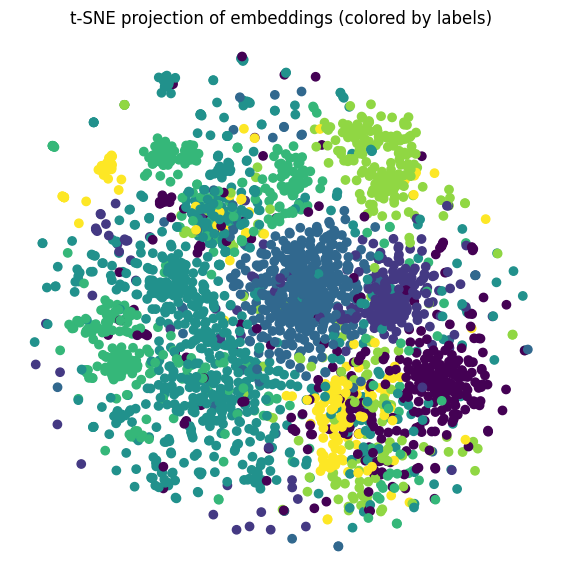

Walklets model heatmap for scale k=5:


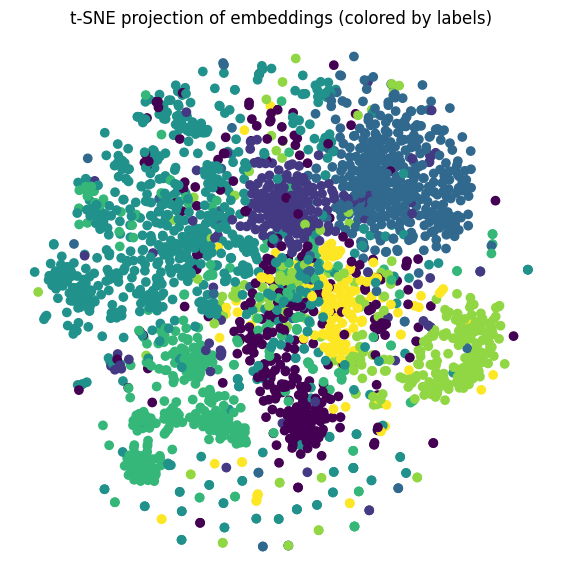

Walklets model heatmap for scale k=8:


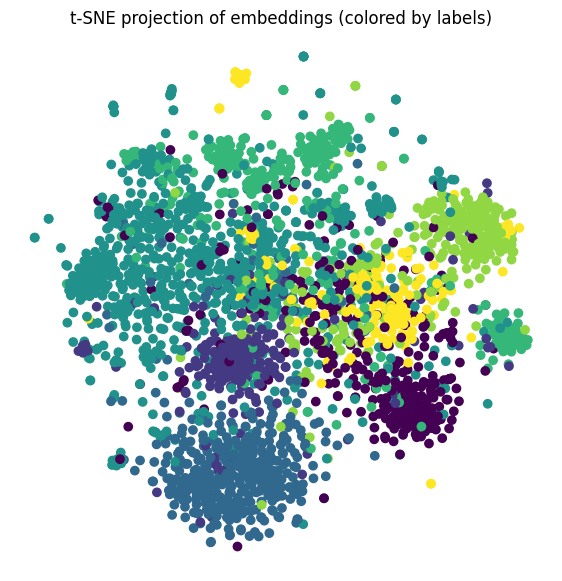

Random Walk model heatmap:


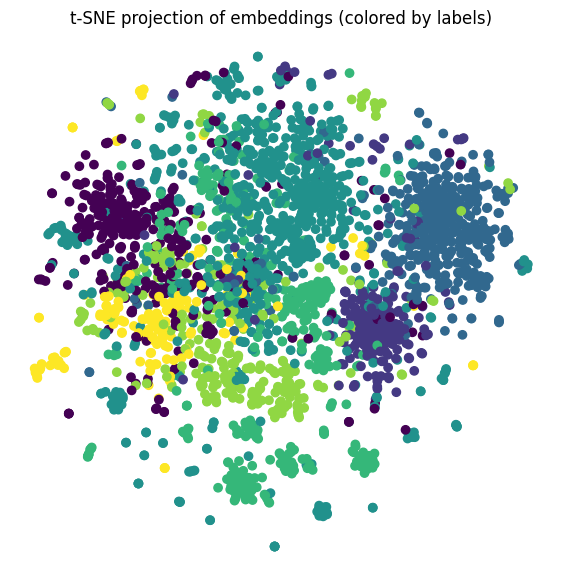


-->Starting evaluation of loss and uF1(Test2)...
Percentage: 10%
	Iteration 1
		RandomWalk → Loss: 0.050386, uF1: 0.603774
		Walklets (k=2) → Loss: 0.054584, uF1: 0.642330
		Walklets (k=5) → Loss: 0.073880, uF1: 0.643560
		Walklets (k=8) → Loss: 0.081060, uF1: 0.660377
	Iteration 2
		RandomWalk → Loss: 0.050386, uF1: 0.603774
		Walklets (k=2) → Loss: 0.054584, uF1: 0.642330
		Walklets (k=5) → Loss: 0.073880, uF1: 0.643560
		Walklets (k=8) → Loss: 0.081060, uF1: 0.660377
	Iteration 3
		RandomWalk → Loss: 0.050386, uF1: 0.603774
		Walklets (k=2) → Loss: 0.054584, uF1: 0.642330
		Walklets (k=5) → Loss: 0.073880, uF1: 0.643560
		Walklets (k=8) → Loss: 0.081060, uF1: 0.660377
Percentage: 50%
	Iteration 1
		RandomWalk → Loss: 0.363180, uF1: 0.632201
		Walklets (k=2) → Loss: 0.340356, uF1: 0.666913
		Walklets (k=5) → Loss: 0.341055, uF1: 0.687592
		Walklets (k=8) → Loss: 0.398868, uF1: 0.672083
	Iteration 2
		RandomWalk → Loss: 0.363180, uF1: 0.632201
		Walklets (k=2) → Loss: 0.340356, uF1: 

In [3]:
import os
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
# Add parent directory for imports
parent_dir = os.path.abspath(os.path.join(".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
# Import your own modules
from alg_base_code.random_walks import RandomWalkEmbedder
from alg_base_code.walklets import WalkletsEmbedder
from utils.utils import plot_similarity_heatmap, split_graph
# Set random seed and parameters
seed = 42
scales = [2, 5, 8]  # Multiple scales to test
percentages = [0.1, 0.5, 0.9]
iterations = 3
root_node = 0
epochLReg = 600
# Setup output directories
model_dir = os.path.join("..", "models_emb", "Cora")


# Load dataset and convert to NetworkX
print("-->Loading Cora dataset...")
dataset = Planetoid(root=os.path.join("..", "datasets", "Cora"), name="Cora")
data = dataset[0]
Cora_nx = to_networkx(data, to_undirected=True)
labels = data.y.numpy()

# Initialize and train models
print("\n-->Initializing models...")
walklets_model = WalkletsEmbedder(seed=seed,walk_number=15,epochs=125)
random_walk_model = RandomWalkEmbedder(seed=seed,walk_number=15,epochs=125)

# Train models
#print("\n-->Training Walklets model with multiple scales:", scales)
#walklets_model.fit(Cora_nx, scales=scales)
#print("\n-->Training Random Walk model...")
#random_walk_model.fit(Cora_nx)

# Store embeddings
#walklets_path = os.path.join(model_dir, "walklets_emb")
#random_walk_path = os.path.join(model_dir, "random_walk_emb")
#walklets_model.store_emb(walklets_path)
#random_walk_model.store_emb(random_walk_path)
#print(f"\n-->Saved embeddings to \n{model_dir}")
# Load pre-trained models
walklets_model.load_emb(os.path.join(model_dir, "walklets_emb"))
random_walk_model.load_emb(os.path.join(model_dir, "random_walk_emb"))

# Test1
# Generate heatmaps for each individual scale for Walklets and Random Walk(k=1)
print("\n\n-->Generating similarity heatmaps(Test1)...")
print("Generating heatmaps for each scale individually:")
for scale in scales:
    print(f"Walklets model heatmap for scale k={scale}:")
    scale_emb = walklets_model.get_scale_embedding(scale)
    plot_similarity_heatmap(embeddings=scale_emb,cmap='viridis',labels=labels)
print("Random Walk model heatmap:")
random_walk_emb = random_walk_model.get_embedding()
plot_similarity_heatmap(embeddings=random_walk_emb,cmap='viridis',labels=labels)

# Test2
# Initialize result containers(dict type)
walklets_results = {k: {"scale": k, "perc_results": {}} for k in scales}
random_walk_results = {perc: {"perc":perc, "uf1": [], "avg_loss": []} for perc in percentages}

print("\n-->Starting evaluation of loss and uF1(Test2)...")
# Main evaluation loop
for perc in percentages:
    print(f"Percentage: {int(perc * 100)}%")
    for it in range(iterations):
        print(f"\tIteration {it + 1}")

        # Split train/test nodes
        graph_train, labels_train, graph_test, labels_test = split_graph(Cora_nx, labels, perc, seed=seed)

        # Collect training and testing nodes
        train_nodes = list(graph_train.nodes())
        test_nodes = list(graph_test.nodes())
        y_train = np.array([labels[n] for n in train_nodes])
        y_test = np.array([labels[n] for n in test_nodes])

        # === RANDOM WALK Phase ===
        X_train_rw = random_walk_model.get_embedding_specific(train_nodes)
        X_test_rw = random_walk_model.get_embedding_specific(test_nodes)

        clf_rw = LogisticRegression(max_iter=epochLReg)
        # Note: The solver 'lbfgs' is generally more stable for larger datasets
        clf_rw.fit(X_train_rw, y_train)
        preds_rw = clf_rw.predict(X_test_rw)
        probs_rw = clf_rw.predict_proba(X_train_rw)
        loss_rw = log_loss(y_train, probs_rw)
        uf1_rw = f1_score(y_test, preds_rw, average="micro")

        random_walk_results[perc]["uf1"].append(uf1_rw)
        random_walk_results[perc]["avg_loss"].append(loss_rw)

        print(f"\t\tRandomWalk → Loss: {loss_rw:.6f}, uF1: {uf1_rw:.6f}")

        # === WALKLETS Phase (loop over scales) ===
        for k in scales:
            X_train_wk = walklets_model.get_scale_embedding_specific(train_nodes, scale=k)
            X_test_wk = walklets_model.get_scale_embedding_specific(test_nodes, scale=k)

            clf_wk = LogisticRegression(max_iter=epochLReg)
            clf_wk.fit(X_train_wk, y_train)
            preds_wk = clf_wk.predict(X_test_wk)
            probs_wk = clf_wk.predict_proba(X_train_wk)
            loss_wk = log_loss(y_train, probs_wk)
            uf1_wk = f1_score(y_test, preds_wk, average="micro")

            # Store results
            if perc not in walklets_results[k]["perc_results"]:
                walklets_results[k]["perc_results"][perc] = {"perc":perc,"uf1": [], "avg_loss": []}
            walklets_results[k]["perc_results"][perc]["uf1"].append(uf1_wk)
            walklets_results[k]["perc_results"][perc]["avg_loss"].append(loss_wk)

            print(f"\t\tWalklets (k={k}) → Loss: {loss_wk:.6f}, uF1: {uf1_wk:.6f}")

# === Final Summary ===
print("\n===== Final Averaged Results =====")
for perc in percentages:
    p_key = int(perc * 100)
    rw_uF1 = np.mean(random_walk_results[perc]["uf1"])
    rw_loss = np.mean(random_walk_results[perc]["avg_loss"])
    print(f"RandomWalk {p_key}%: Avg uF1 = {rw_uF1:.6f}, Avg Loss = {rw_loss:.6f}")
print("\n")
for k in scales:
    print(f"\nWalklets (scale k={k})")
    for perc in percentages:
        p_key = int(perc * 100)
        if perc in walklets_results[k]["perc_results"]:
            uf1_list = walklets_results[k]["perc_results"][perc]["uf1"]
            loss_list = walklets_results[k]["perc_results"][perc]["avg_loss"]
            avg_uf1 = np.mean(uf1_list)
            avg_loss = np.mean(loss_list)
            print(f"{p_key}%: → Avg uF1 = {avg_uf1:.6f}, Avg Loss = {avg_loss:.6f}")

# 2.Karate Club
## General Aspects

- this dataset contains nodes that represent members of a karate club  
associated with labels that correspond to their faction allegiance

- an edge between two nodes indicates that the two members had social  
interactions outside the club

## Interpretation of tests
- we load the network 

- we will take the emb. algorithms, described in `random_walks.RandomWalkEmbedder`  
and in `walklets.WalkletsEmbedder`, and instance them

- we instance the models with the standard parameters:   
number of epochs of training the embedds(through Word2Vec EmbedderModel)=250  
number of walks from a node=10(enough for 34 nodes)  
walk length=4(enough for 34 nodes)  
dimension of emb.=128(used in Walklets research paper)  
learning rate of 0.025(used in Walklets research paper)
- we will train the embedds on different scales k=2,k=3 the maximum could be 4(walk length)  
on the walklets model and with k=1(only this possible) the random walks model(RandomWalk)  
- we save the embeddings of both algorithms into ../models/ for future use
*if you have trained the embeddings already and you have stored them in the folder mentioned above*  
*instead of calling fit after you instantiate the models, you will call load providing the path of the folder*  
*then calling the same methods used for plotting heatmaps and computing uF1 and loss*

1st test,(1)
- for each scale trained, we test the communities info preserved by Walklets by plotting (A)  
or (B)

- for RandomWalk embeddings we test the communities info by plotting (A) or (B)
- (A)=we will plot the the embeddings redimensioned with TSNE and colored by thier node's labels,  
this is okay for high order networks
- (B)=we plot the graph nodes colored by the similarities in case of lower order networks

2nd test (2)
- for each scale trained, we test the feature-label asocciation capacity info, by using the emb. as features for every node,
and give them to a multiclasification model `sklearn.linear_model.LogisticRegression`(best for both accuracy and training time)
    
- we will train than the model with 600 epoch on **10%, 50%, 90%** of the emebds as training dataset and use the remaining for  
testing
- we will compute the **[micro-F1 accuracy](https://www.kdnuggets.com/2023/01/micro-macro-weighted-averages-f1-score-clearly-explained.html)** from test phase and **Avg-Loss** from train phase
and averaging this results across 3 iterations  

**at percetage% k, we will for 3 iterations, extract k training nodes randomly, train, test, and get that 2 metrics*
*the test (2) applies both to emb.obtained via RandomWalk respectively Walklets*

## Implementation code-level

**Scales set to k=2,3**

-->Loading Karate Club dataset...

-->Initializing models...

-->Training Walklets model with multiple scales: [2, 3]
Generated a total of 340 random walks of length 4, starting from 34.0 nodes.

Processing scale k=2
Extracted 340 walklets for scale k=2
Word2Vec-->Epoch 1/250, Loss: 0.9241
Word2Vec-->Epoch 2/250, Loss: 0.9234
Word2Vec-->Epoch 3/250, Loss: 0.9215
Word2Vec-->Epoch 4/250, Loss: 0.9179
Word2Vec-->Epoch 5/250, Loss: 0.9123
Word2Vec-->Epoch 6/250, Loss: 0.9043
Word2Vec-->Epoch 7/250, Loss: 0.8938
Word2Vec-->Epoch 8/250, Loss: 0.8806
Word2Vec-->Epoch 9/250, Loss: 0.8648
Word2Vec-->Epoch 10/250, Loss: 0.8465
Word2Vec-->Epoch 11/250, Loss: 0.8260
Word2Vec-->Epoch 12/250, Loss: 0.8037
Word2Vec-->Epoch 13/250, Loss: 0.7802
Word2Vec-->Epoch 14/250, Loss: 0.7561
Word2Vec-->Epoch 15/250, Loss: 0.7322
Word2Vec-->Epoch 16/250, Loss: 0.7091
Word2Vec-->Epoch 17/250, Loss: 0.6876
Word2Vec-->Epoch 18/250, Loss: 0.6682
Word2Vec-->Epoch 19/250, Loss: 0.6513
Word2Vec-->Epoch 20/250, Loss: 0.

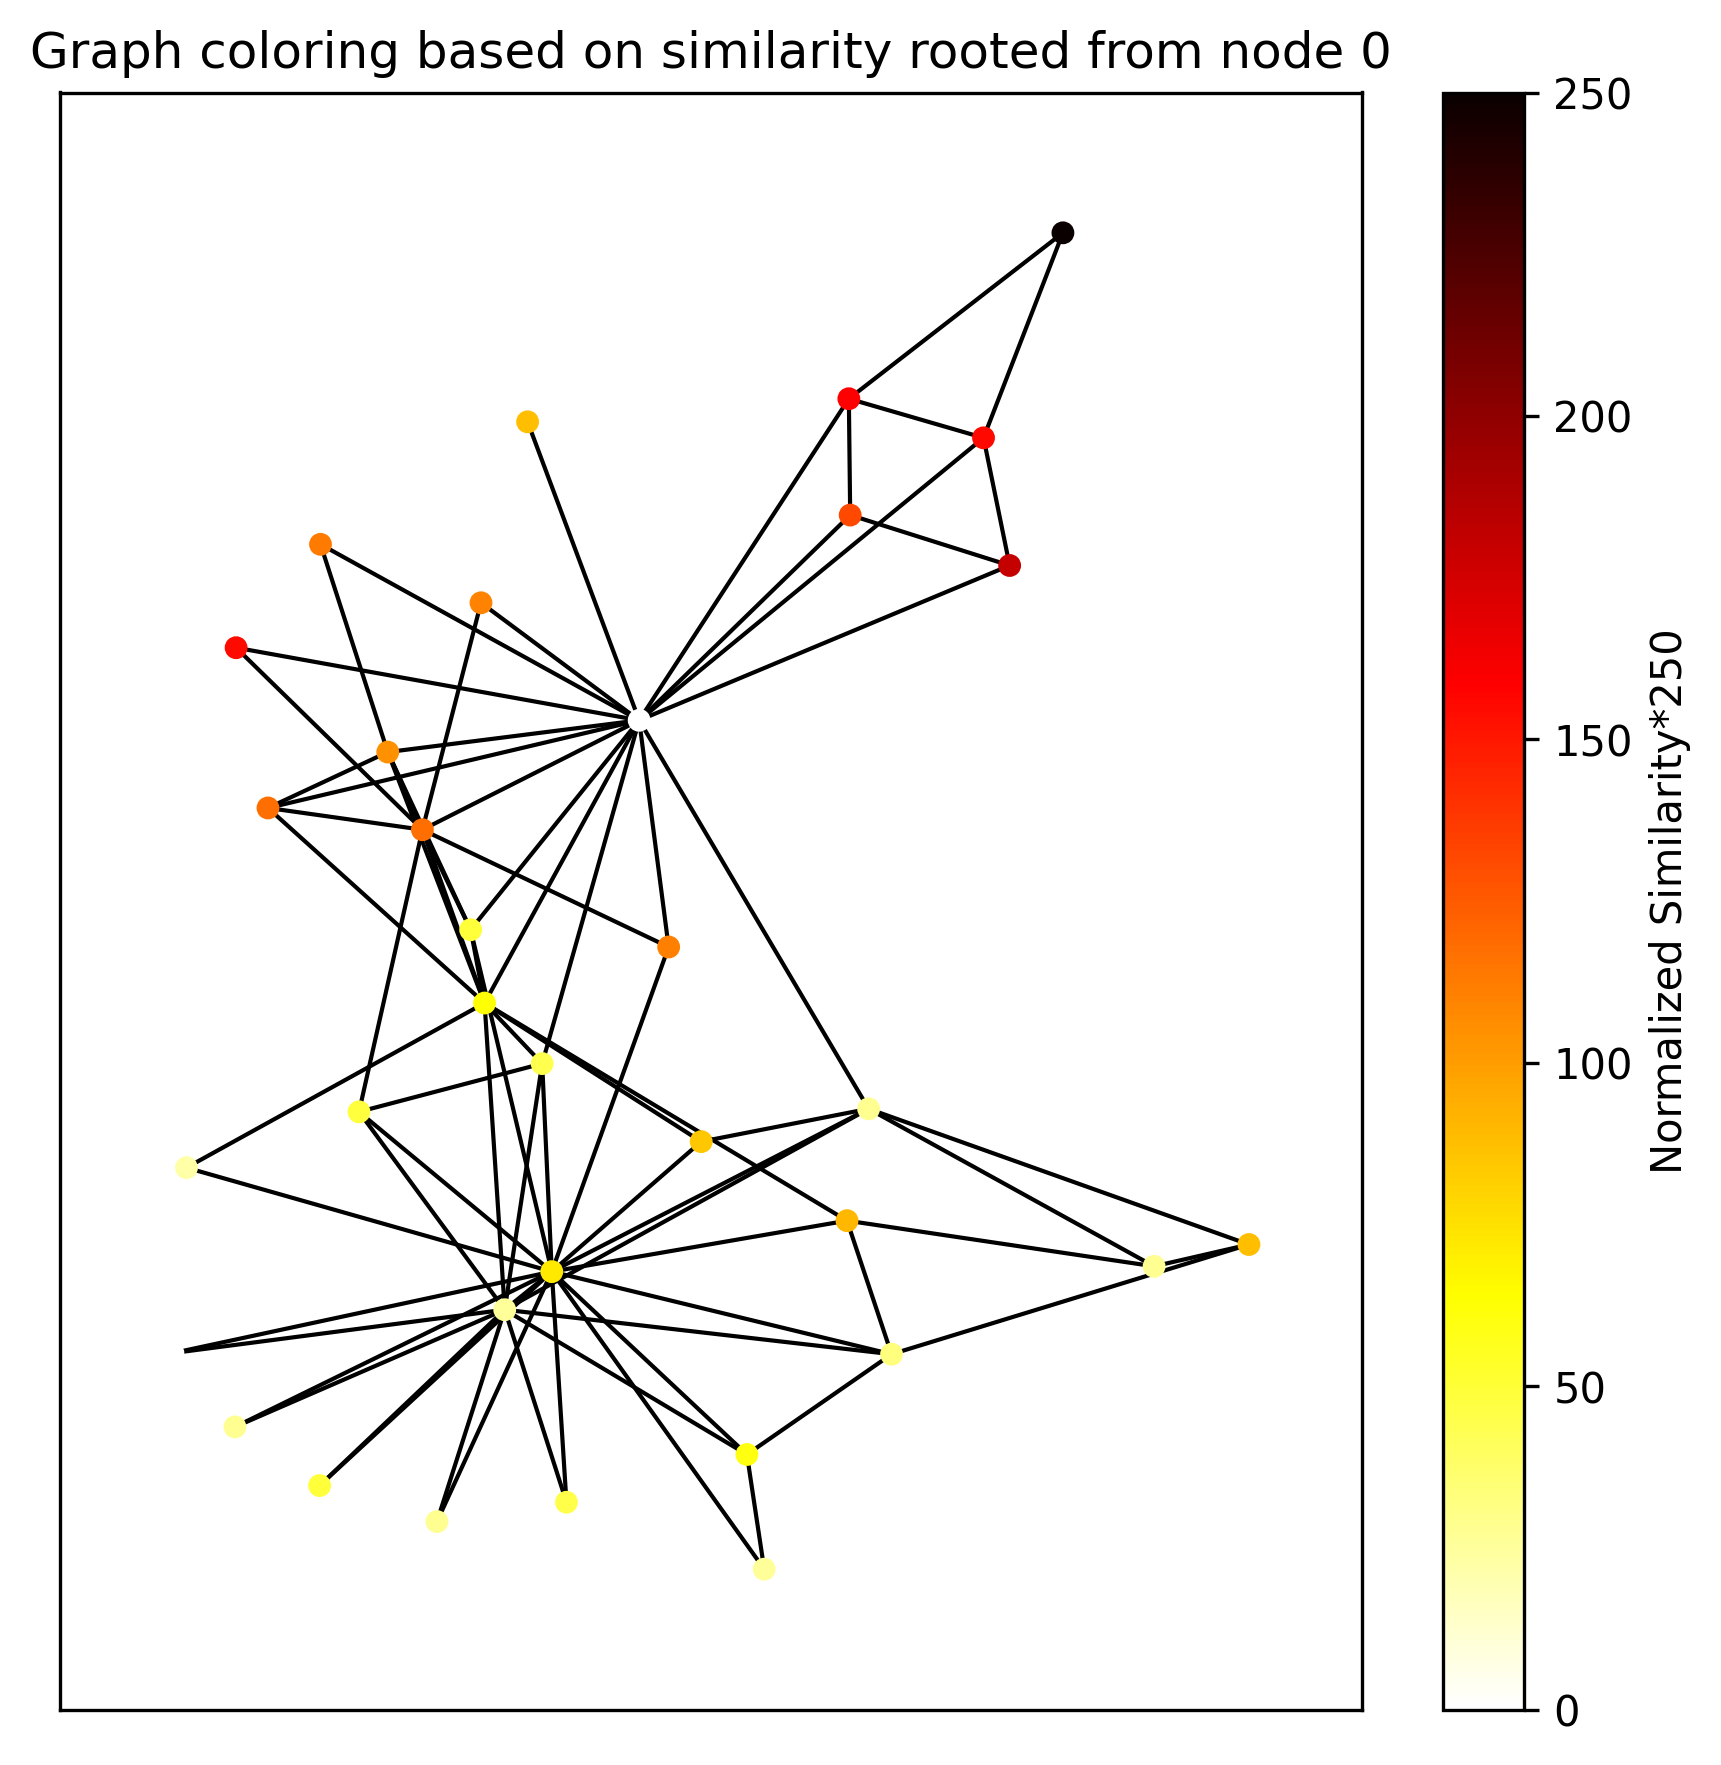

Walklets model heatmap for scale k=3:


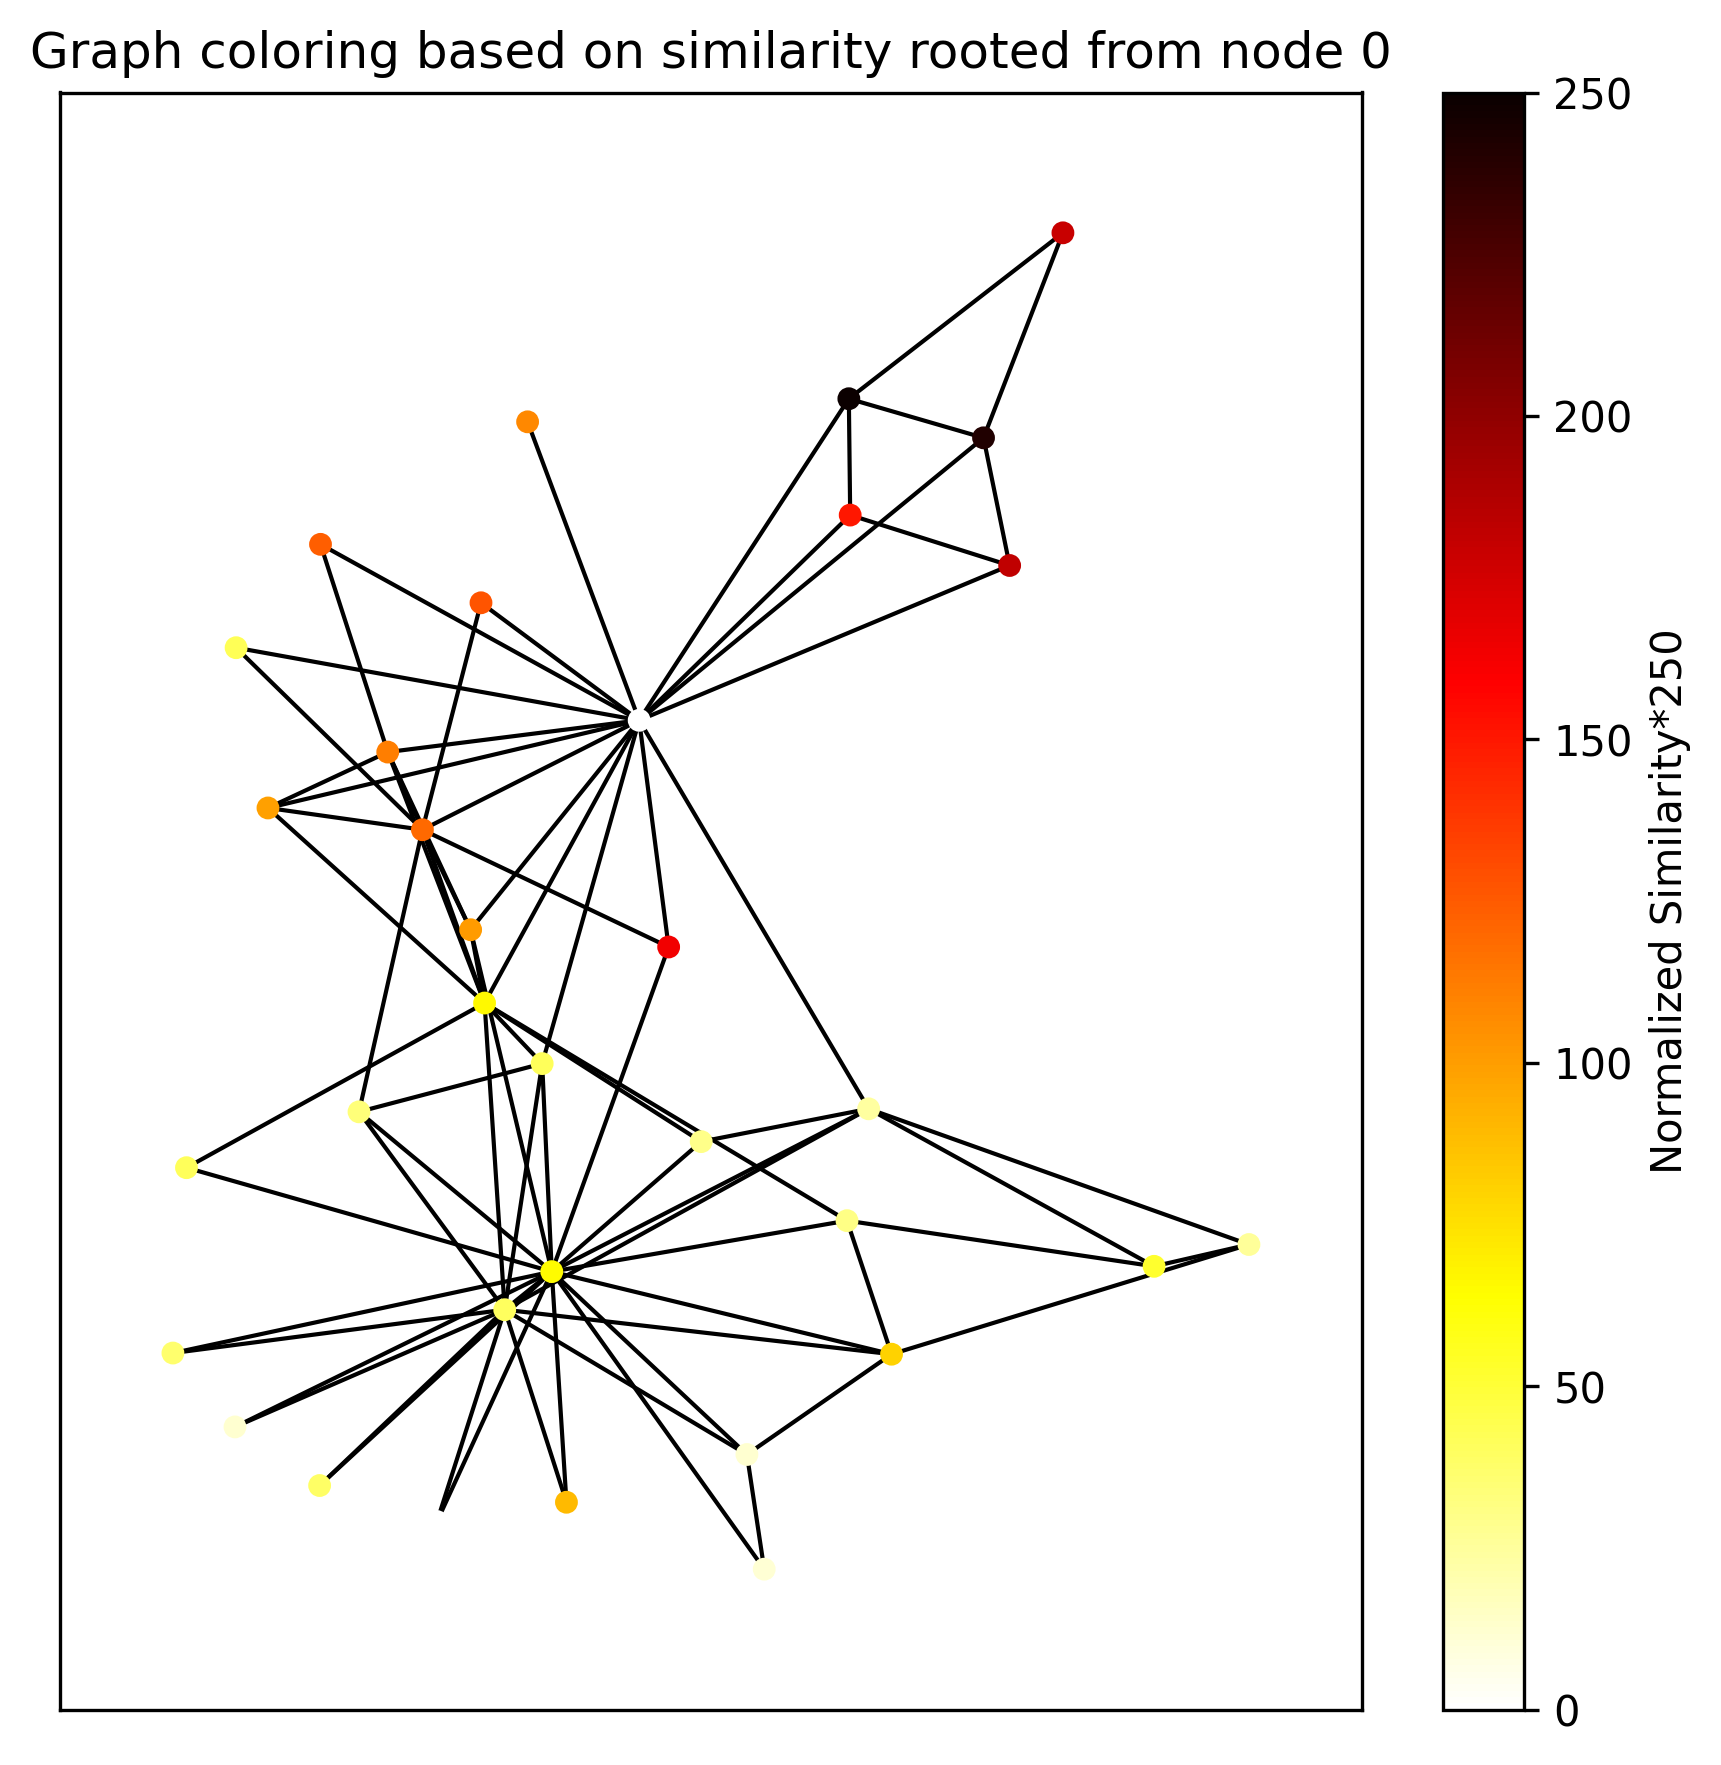

Random Walk model heatmap:


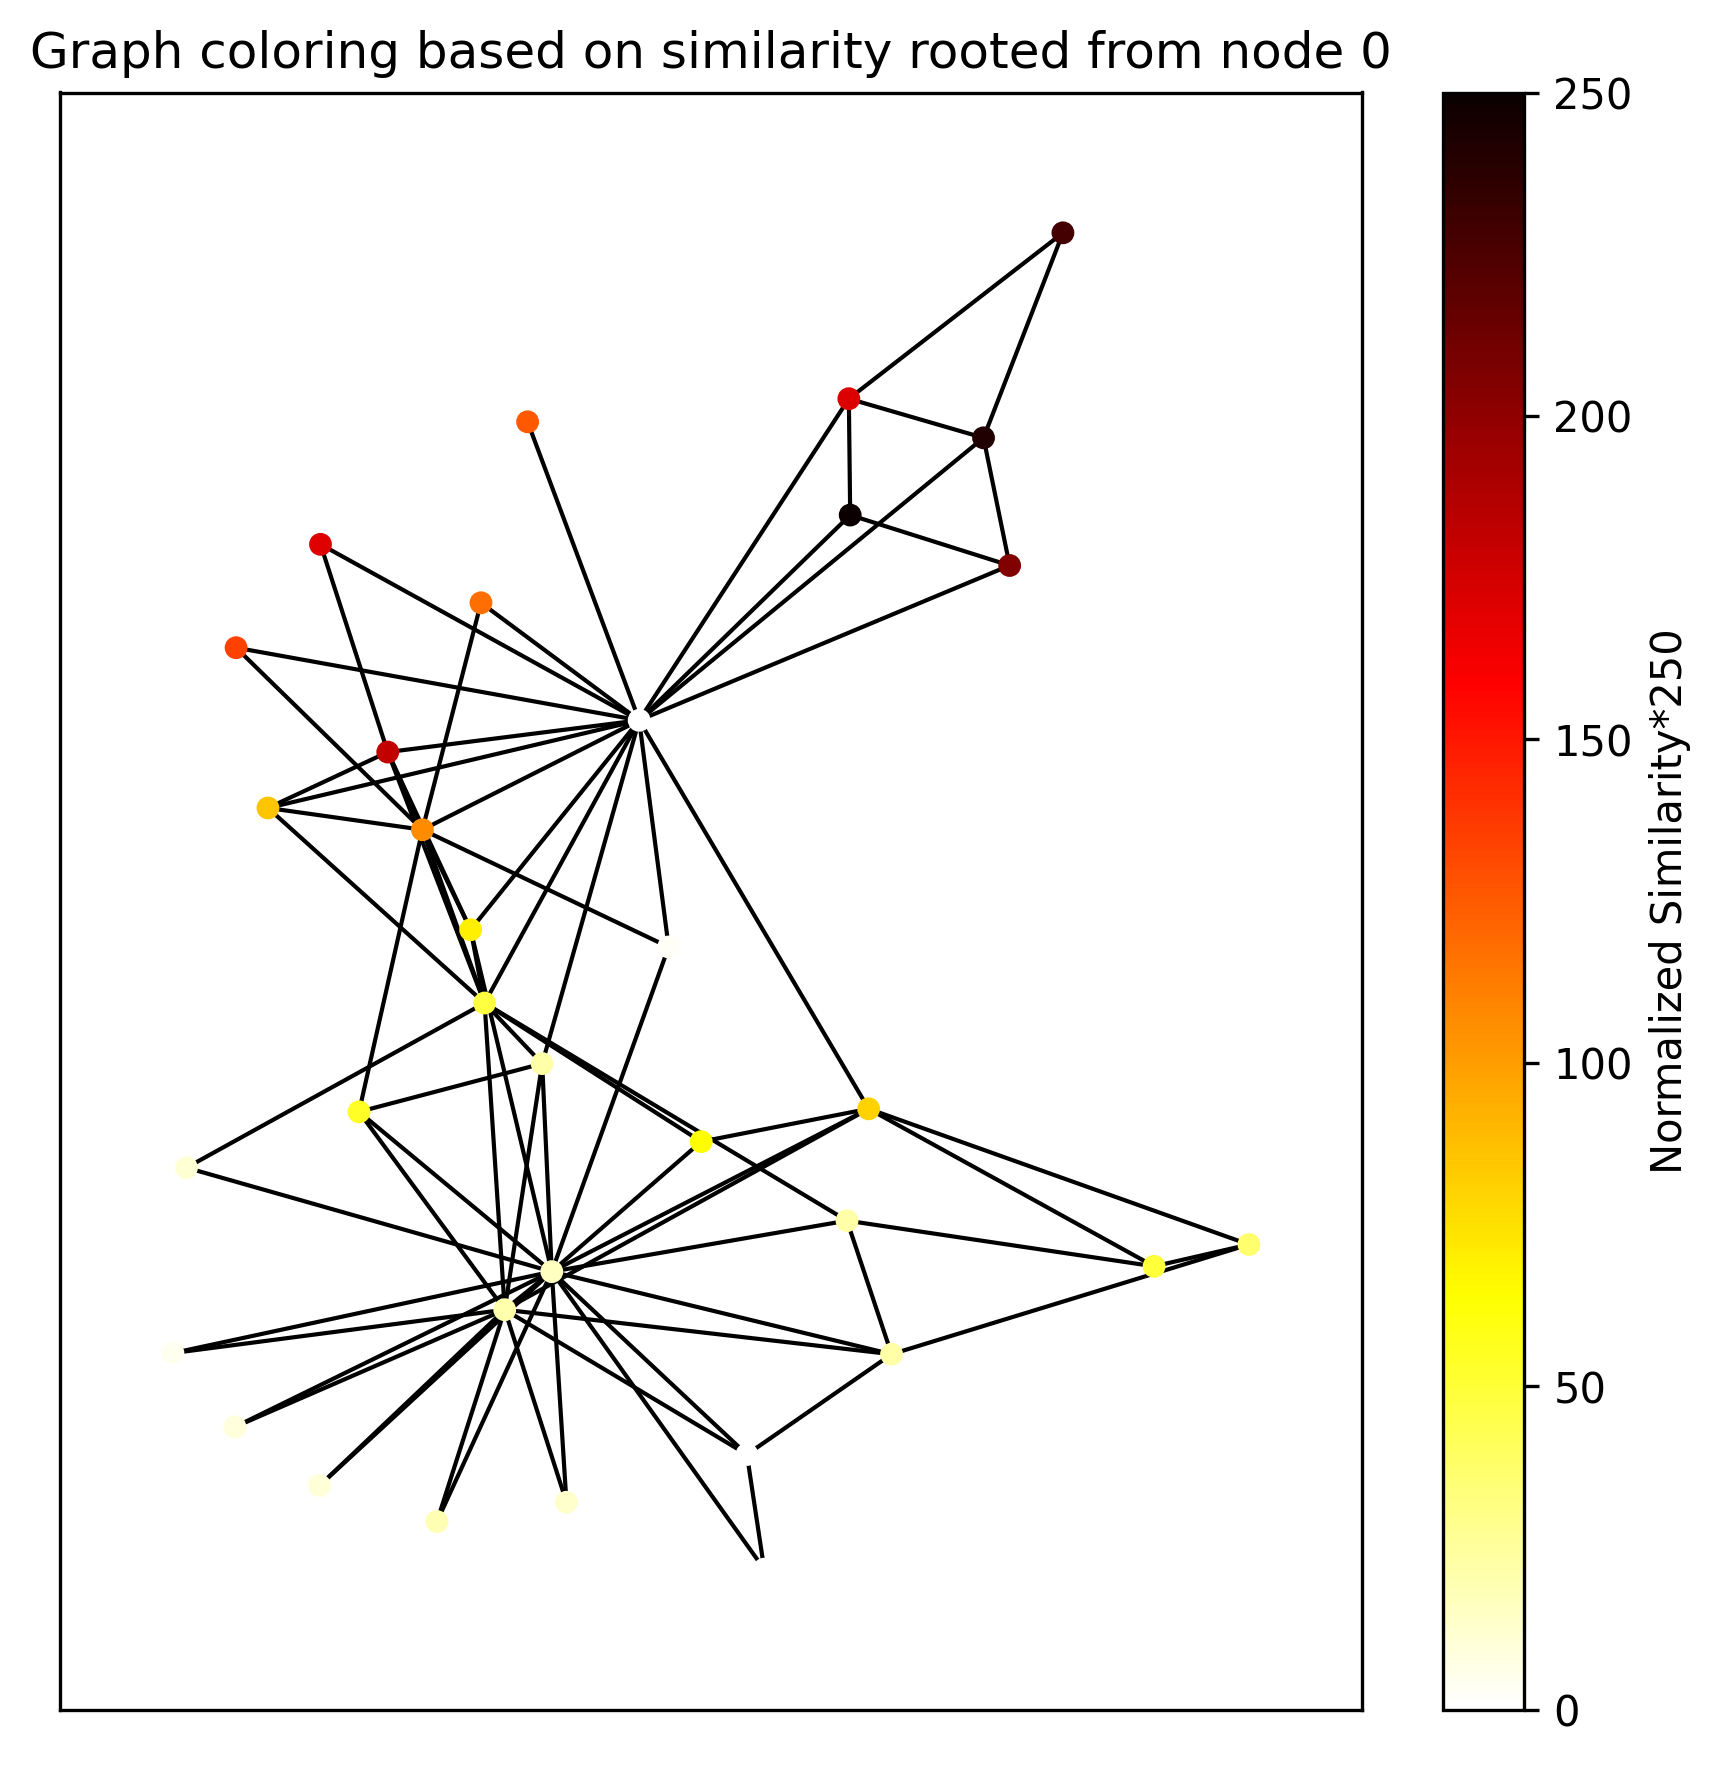


-->Starting evaluation of loss and uF1(Test2)...
Percentage: 10%
	Iteration 1
		RandomWalk → Loss: 0.190370, uF1: 0.516129
		Walklets (k=2) → Loss: 0.235112, uF1: 0.741935
		Walklets (k=3) → Loss: 0.221250, uF1: 0.483871
	Iteration 2
		RandomWalk → Loss: 0.190370, uF1: 0.516129
		Walklets (k=2) → Loss: 0.235112, uF1: 0.741935
		Walklets (k=3) → Loss: 0.221250, uF1: 0.483871
	Iteration 3
		RandomWalk → Loss: 0.190370, uF1: 0.516129
		Walklets (k=2) → Loss: 0.235112, uF1: 0.741935
		Walklets (k=3) → Loss: 0.221250, uF1: 0.483871
Percentage: 50%
	Iteration 1
		RandomWalk → Loss: 0.186224, uF1: 1.000000
		Walklets (k=2) → Loss: 0.307780, uF1: 0.882353
		Walklets (k=3) → Loss: 0.428023, uF1: 0.705882
	Iteration 2
		RandomWalk → Loss: 0.186224, uF1: 1.000000
		Walklets (k=2) → Loss: 0.307780, uF1: 0.882353
		Walklets (k=3) → Loss: 0.428023, uF1: 0.705882
	Iteration 3
		RandomWalk → Loss: 0.186224, uF1: 1.000000
		Walklets (k=2) → Loss: 0.307780, uF1: 0.882353
		Walklets (k=3) → Loss: 0.4280

In [1]:
import os
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
# Add parent directory for imports
parent_dir = os.path.abspath(os.path.join(".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
# Import your own modules
from alg_base_code.random_walks import RandomWalkEmbedder
from alg_base_code.walklets import WalkletsEmbedder
from utils.utils import plot_similarity_heatmap, split_graph
# Set random seed and parameters
seed = 42
scales = [2, 3]  # Multiple scales to test
percentages = [0.1, 0.5, 0.9]
iterations = 3
root_node = 0
epochLReg = 600
# Setup output directories
model_dir = os.path.join("..", "models_emb", "Karate_Club")

# Load dataset and convert to NetworkX
print("-->Loading Karate Club dataset...")
dataset = KarateClub()
data = dataset[0]
Karate_nx = to_networkx(data, to_undirected=True)
labels = data.y.numpy()

# Initialize and train models
print("\n-->Initializing models...")
walklets_model = WalkletsEmbedder(seed=seed,walk_length=4,walk_number=10)
random_walk_model = RandomWalkEmbedder(seed=seed,walk_length=4,walk_number=10)

# Train models
print("\n-->Training Walklets model with multiple scales:", scales)
walklets_model.fit(Karate_nx, scales=scales)
print("\n-->Training Random Walk model...")
random_walk_model.fit(Karate_nx)

# Store embeddings
walklets_path = os.path.join(model_dir, "walklets_emb")
random_walk_path = os.path.join(model_dir, "random_walk_emb")
walklets_model.store_emb(walklets_path)
random_walk_model.store_emb(random_walk_path)
print(f"\n-->Saved embeddings to \n{model_dir}")

# Test1
# Generate heatmaps for each individual scale for Walklets and Random Walk(k=1)
print("\n\n-->Generating similarity heatmaps(Test1)...")
print("Generating heatmaps for each scale individually:")
for scale in scales:
    print(f"Walklets model heatmap for scale k={scale}:")
    scale_emb = walklets_model.get_scale_embedding(scale)
    plot_similarity_heatmap(embeddings=scale_emb,
                            node=root_node,
                            graph=Karate_nx,
                            opt=1,
                            dpi=300,
                            node_size=20)
print("Random Walk model heatmap:")
random_walk_emb = random_walk_model.get_embedding()
plot_similarity_heatmap(embeddings=random_walk_emb,
                        node=root_node,
                        graph=Karate_nx,
                        opt=1,
                        dpi=300,
                        node_size=20)

# Test2
# Initialize result containers
walklets_results = {k: {"scale": k, "perc_results": {}} for k in scales}
random_walk_results = {perc: {"perc":perc, "uf1": [], "avg_loss": []} for perc in percentages}

print("\n-->Starting evaluation of loss and uF1(Test2)...")
# Main evaluation loop
for perc in percentages:
    print(f"Percentage: {int(perc * 100)}%")
    for it in range(iterations):
        print(f"\tIteration {it + 1}")

        # Split train/test nodes
        graph_train, labels_train, graph_test, labels_test = split_graph(Karate_nx, labels, perc, seed=seed)

        # Collect training and testing nodes
        train_nodes = list(graph_train.nodes())
        test_nodes = list(graph_test.nodes())
        y_train = np.array([labels[n] for n in train_nodes])
        y_test = np.array([labels[n] for n in test_nodes])

        # === RANDOM WALK Phase ===
        X_train_rw = random_walk_model.get_embedding_specific(train_nodes)
        X_test_rw = random_walk_model.get_embedding_specific(test_nodes)

        clf_rw = LogisticRegression(max_iter=epochLReg)
        # Note: The solver 'lbfgs' is generally more stable for larger datasets
        clf_rw.fit(X_train_rw, y_train)
        preds_rw = clf_rw.predict(X_test_rw)
        probs_rw = clf_rw.predict_proba(X_train_rw)
        loss_rw = log_loss(y_train, probs_rw)
        uf1_rw = f1_score(y_test, preds_rw, average="micro")

        random_walk_results[perc]["uf1"].append(uf1_rw)
        random_walk_results[perc]["avg_loss"].append(loss_rw)

        print(f"\t\tRandomWalk → Loss: {loss_rw:.6f}, uF1: {uf1_rw:.6f}")

        # === WALKLETS Phase (loop over scales) ===
        for k in scales:
            X_train_wk = walklets_model.get_scale_embedding_specific(train_nodes, scale=k)
            X_test_wk = walklets_model.get_scale_embedding_specific(test_nodes, scale=k)

            clf_wk = LogisticRegression(max_iter=epochLReg)
            clf_wk.fit(X_train_wk, y_train)
            preds_wk = clf_wk.predict(X_test_wk)
            probs_wk = clf_wk.predict_proba(X_train_wk)
            loss_wk = log_loss(y_train, probs_wk)
            uf1_wk = f1_score(y_test, preds_wk, average="micro")

            # Store results
            if perc not in walklets_results[k]["perc_results"]:
                walklets_results[k]["perc_results"][perc] = {"perc":perc,"uf1": [], "avg_loss": []}
            walklets_results[k]["perc_results"][perc]["uf1"].append(uf1_wk)
            walklets_results[k]["perc_results"][perc]["avg_loss"].append(loss_wk)

            print(f"\t\tWalklets (k={k}) → Loss: {loss_wk:.6f}, uF1: {uf1_wk:.6f}")

# === Final Summary ===
print("\n===== Final Averaged Results =====")
for perc in percentages:
    p_key = int(perc * 100)
    rw_uF1 = np.mean(random_walk_results[perc]["uf1"])
    rw_loss = np.mean(random_walk_results[perc]["avg_loss"])
    print(f"RandomWalk {p_key}%: Avg uF1 = {rw_uF1:.6f}, Avg Loss = {rw_loss:.6f}")
print("\n")
for k in scales:
    print(f"\nWalklets (scale k={k})")
    for perc in percentages:
        p_key = int(perc * 100)
        if perc in walklets_results[k]["perc_results"]:
            uf1_list = walklets_results[k]["perc_results"][perc]["uf1"]
            loss_list = walklets_results[k]["perc_results"][perc]["avg_loss"]
            avg_uf1 = np.mean(uf1_list)
            avg_loss = np.mean(loss_list)
            print(f"{p_key}%: → Avg uF1 = {avg_uf1:.6f}, Avg Loss = {avg_loss:.6f}")